# 基于协方差矩阵的特征值分解算法

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [29]:
def loaddata():
    data = np.loadtxt('data/pca_data.csv',delimiter=',')
    return data

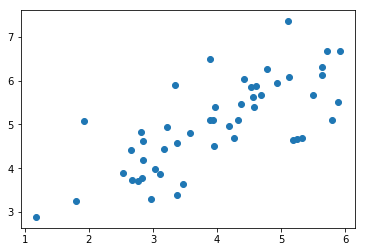

In [30]:
X = loaddata()
plt.scatter(X[:,0],X[:,1])
plt.show()

### 特征归一化

In [31]:
def featureNormalize(X):
    mu = np.mean(X,axis=0).reshape(1,-1)
    sigma = np.std(X,axis=0,ddof=1).reshape(1,-1)
    X = (X-mu)/sigma
    return X,mu,sigma

### PCA实现
<img src="images/01.png" width="500" align="left" />

In [32]:
def pca(X,K):
    m = len(X)
    sigma = np.dot(np.transpose(X),X)/(m-1)

    #返回的特征向量要是排序后的
    eigenvalues,eigenvectors = np.linalg.eig(sigma)

    index = np.argsort(-eigenvalues)  # 依照featValue进行从大到小排序
    eigenvectors = eigenvectors[:,index]

    u_reduce = eigenvectors[:, 0:K]
    return np.dot(X, u_reduce),eigenvectors

In [33]:
X,mu,sigma = featureNormalize(X)
Z,eigenvectors = pca(X,1)
print(Z)

[[ 1.48127391]
 [-0.91291229]
 [ 1.21208656]
 [ 1.62734009]
 [ 1.26042409]
 [-0.96700223]
 [ 1.25605967]
 [-2.31794969]
 [-0.02968998]
 [-0.77386123]
 [-0.62532902]
 [-0.54724542]
 [-0.08878025]
 [-0.520569  ]
 [ 1.548434  ]
 [-1.89684585]
 [-0.87788459]
 [ 0.94646472]
 [-2.30653955]
 [-0.4731351 ]
 [-2.19518524]
 [ 0.38509662]
 [-1.76688508]
 [ 0.0512347 ]
 [ 1.64838858]
 [ 0.50302869]
 [-1.2246766 ]
 [-1.16020771]
 [ 0.83375215]
 [-0.00686207]
 [-0.22565101]
 [-1.49788781]
 [ 1.3252858 ]
 [-0.58656923]
 [ 0.67225099]
 [-1.33938187]
 [ 1.67053477]
 [-1.37836539]
 [ 2.53419743]
 [-0.27570789]
 [-0.96695982]
 [ 0.8792732 ]
 [ 1.28362916]
 [-0.97972108]
 [ 1.79450473]
 [-0.26923019]
 [ 3.16088618]
 [ 1.20080033]
 [ 0.36423084]
 [-1.42814204]]


In [34]:
def recoverData(Z, U, K):
    U_reduce = U[:,0:K]
    X_rec = np.dot(Z,np.transpose(U_reduce))
    return X_rec

In [35]:
def plotData(X_orgin,X_rec):
    plt.scatter(X_orgin[:,0],X_orgin[:,1])
    plt.scatter(X_rec[:, 0], X_rec[:, 1],c='red')
    plt.show()

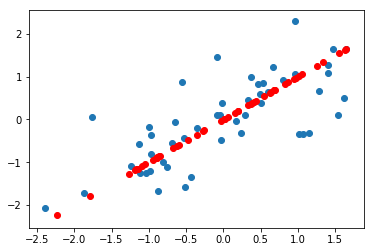

In [36]:
X_rec = recoverData(Z,eigenvectors,1)
plotData(X,X_rec)